<a href="https://colab.research.google.com/github/AnnCherk/Introduction-to-ML/blob/main/DT_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация при помощи ДПР

# Описание набора данных

В этой лабораторной работе мы рассмотрим разные подходы к задаче классификации, в частности, деревья принятия решений, а также поговорим о том, как бороться с несбалансированностью датасета.

Изучаемый нами набор данных — это набор данных о принятых предложениях по кредитам в банке **Thera-Bank**. Основные клиенты банка пользуются банком для того, чтобы разместить в нем свои денежные средства, то есть являются вкладчиками. В то же время, большую прибыль банку приносят кредиторы — люди, берущие в банке кредит. Поэтому банк хочет сформировать для своих вкладчиков выгодные предложения по кредиту. Кампания, проведенная банком для вкладчиков в прошлом году, показала, что коэффициент конверсии составил более 9,6%. Это побудило отдел маркетинга разработать кампании с улучшенным целевым маркетингом, чтобы увеличить вероятность успеха при, естественно, минимальном бюджете. Департамент хотел бы разработать классификатор, который поможет им определить потенциальных клиентов, которые с большей вероятностью приобретут кредит. Это повысит вероятность успеха при одновременном снижении стоимости кампании.

Набор данных содержит как информацию о клиенте, так и информацию о его реакции на кампанию предыдущего года:

*   **ID**: ID клиента

*   **Age**: Возраст (полных лет)

*   **Experience**: Стаж

*   **Income**: Годовой доход (в тысячах)

*   **ZIP Code**: Индекс места проживания

*   **Family**: Количество членов семьи

*   **CCAvg**: Средние траты в месяц по кредитной карте (в тысячах)

*   **Education**: Уровень образования (1: бакалавр, 2: магистр, 3: что-то большее)

*   **Mortgage**: Стоимость ипотеки, если имеется (в тысячах)

*   **Securities Account**: Наличие счета в ценных бумагах

*   **CD Account**: Наличие сертификата на депозит

*   **Online**: Использует ли клиент интернет-банкинг

*   **CreditCard**: Использует ли клиент кредитную карту, выпущенную данным банком

*   **Personal Loan**: Принял ли клиент персональное предложение по кредиту (целевая переменная)

# Разведочный анализ данных

In [ ]:
import pandas as pd

Считайте набор данных в датафрейм

In [ ]:
df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')

При помощи метода <code>.describe()</code> изучите набор данных «с высоты птичьего полета».

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Набор данных содержит 14 переменных, 1 из которых является целевой.

1 номинальная переменная: **ID**

5 числовых переменных: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 категориальные переменных: **Family**, **Education**, **ZIP Code**

5 булевых переменных: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

Пропущенных значений нет.

Experience содержит какие-то отрицательные значения

Удалите колонку ID, она нам не понадобится

In [ ]:
df = df.drop('ID', axis=1)

Имеет смысл попробовать отловить каике-либо зависимости или их отсутствие.

Постройте матрицу корреляций

In [ ]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994134,-0.047440,-0.030978,-0.033864,-0.040827,0.027489,-0.003468,-0.018537,0.000950,0.013890,0.027305,0.014137
Experience,0.994134,1.000000,-0.037976,-0.029845,-0.040127,-0.038459,-0.001394,-0.000700,-0.018108,0.000239,0.016445,0.026962,0.015945
Income,-0.047440,-0.037976,1.000000,-0.015647,-0.156319,0.641660,-0.192029,0.197115,0.497333,0.005082,0.179584,0.013222,0.008567
ZIP Code,-0.030978,-0.029845,-0.015647,1.000000,0.006110,-0.003104,-0.019697,0.003173,-0.007605,-0.000667,0.008082,0.008478,0.001413
Family,-0.033864,-0.040127,-0.156319,0.006110,1.000000,-0.103654,0.070498,-0.024184,0.063050,0.011535,0.019090,0.011682,0.010254
CCAvg,-0.040827,-0.038459,0.641660,-0.003104,-0.103654,1.000000,-0.133361,0.104529,0.365553,0.028449,0.145242,-0.003718,0.004311
Education,0.027489,-0.001394,-0.192029,-0.019697,0.070498,-0.133361,1.000000,-0.028436,0.134556,-0.013329,0.012545,-0.018219,-0.015894
Mortgage,-0.003468,-0.000700,0.197115,0.003173,-0.024184,0.104529,-0.028436,1.000000,0.140203,-0.002341,0.093418,0.007982,-0.002726
Personal Loan,-0.018537,-0.018108,0.497333,-0.007605,0.063050,0.365553,0.134556,0.140203,1.000000,0.030758,0.336931,0.010362,0.010184
Securities Account,0.000950,0.000239,0.005082,-0.000667,0.011535,0.028449,-0.013329,-0.002341,0.030758,1.000000,0.325264,0.014732,-0.021373


Определите две наиболее коррелированных переменных

In [ ]:
import numpy as np

abs_corr =df.corr().abs()

mask = np.triu(np.ones_like(abs_corr, dtype=bool), k=1)

# Выберем только верхний треугольник матрицы корреляций
upper_triangle = abs_corr.where(mask)

# Найдем пару переменных с наибольшим коэффициентом корреляции
max_corr = upper_triangle.max().max()  # максимальное значение корреляции
max_corr_vars = np.where(upper_triangle == max_corr)  # индексы переменных с максимальной корреляцией

# Получим имена переменных
variable1 = abs_corr.index[max_corr_vars[0][0]]
variable2 = abs_corr.columns[max_corr_vars[1][0]]

print(f"Наиболее коррелированные переменные: {variable1} и {variable2} с коэффициентом корреляции {max_corr}")

Наиболее коррелированные переменные: Age и Experience с коэффициентом корреляции 0.9941340415824269


Определите признак, который меньше всего коррелирует (можно считать почти не коррелирует) с остальными признаками (в том числе с откликом). Удалите этот признак из рассмотрения.

Введите название удаленного признака.

In [ ]:
correlation_sums = abs_corr.sum()

# Находим признак с наименьшей суммой корреляций
min_corr_feature = correlation_sums.idxmin()

# Выводим название признака
print(f"Признак: {min_corr_feature}")

Признак: ZIP Code


In [ ]:
df = df.drop('ZIP Code', axis=1)

# Предварительная подготовка данных

## Модификация признаков

Стоит разобраться с полем <code>Experience</code>. Видно, что опыт коррелирует с возрастом. Однако, в поле <code>Experience</code> присутствуют отрицательные значения. Имеет смысл "сдвинуть" значения в этой колонке. Добавьте ко всем значениям колонки <code>Experience</code> одно число так, чтобы минимальное значение было равно $0$.

Вычислите выборочное среднее колонки <code>Experience</code> после преобразования.

In [ ]:
min(df['Experience'])

-3

In [ ]:
df['Experience']=df['Experience']+3

In [ ]:
min(df['Experience'])

0

In [ ]:
round(np.mean(df['Experience']), 3)

23.196

Аналогично имеет смысл модфицировать поле <code>CCAvg</code>. Раз рассматривается годовой доход, то имеет смысл и значения трат рассматривать в рамках года.

Вычислите выборочное среднее колонки <code>CCAvg</code> после преобразования.

In [ ]:
df['CCAvg'] = df['CCAvg']*12

In [ ]:
round(np.mean(df['CCAvg']), 3)

23.062

## Определение выбросов

Постройте ящики с усами для всех предикторов. Рекомендуем использовать <code>sns.boxplot()</code>. Определите признак по изображению boxplot из вашего варианта.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

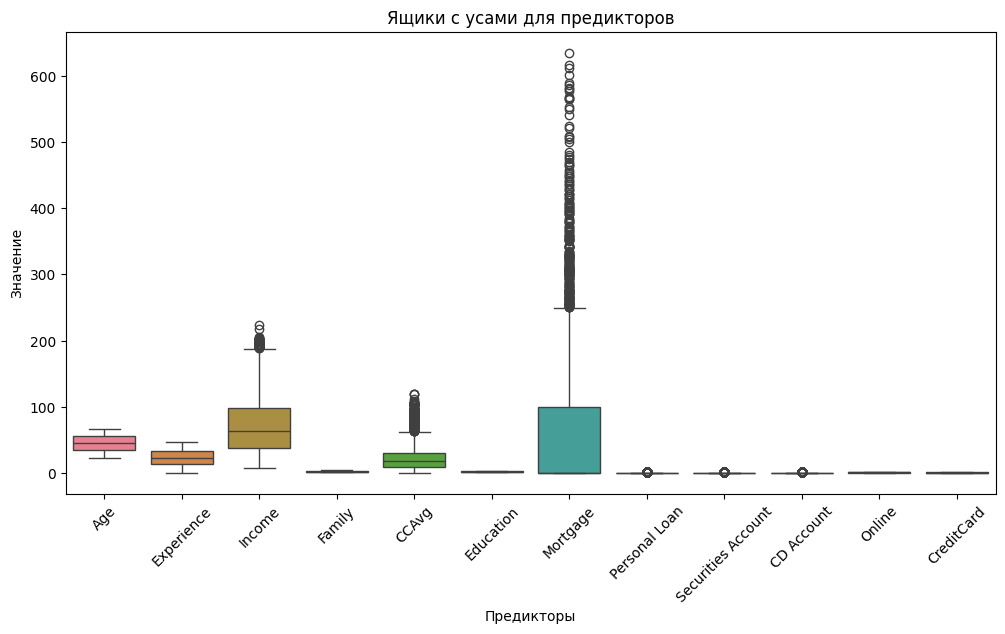

In [ ]:
plt.figure(figsize=(12, 6))  # Размер графика

sns.boxplot(data=df)  # Построение boxplot

plt.xticks(rotation=45)  # Поворот подписей на оси x для лучшей читаемости
plt.xlabel('Предикторы')  # Подпись оси x
plt.ylabel('Значение')  # Подпись оси y
plt.title('Ящики с усами для предикторов')  # Заголовок графика

plt.show()

Определите признак, содержащий наибольшее число выбросов. Введите название этого признака.


In [ ]:
outliers = {}  # Словарь для хранения числа выбросов для каждого признака
for column in df.columns:
    # Вычисляем "усы" ящика для данного признака
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Считаем количество выбросов
    outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    # Записываем количество выбросов для данного признака
    outliers[column] = outliers_count

# Находим признак с наибольшим числом выбросов
max_outliers_feature = max(outliers, key=outliers.get)

# Выводим название признака и количество выбросов
print(f"Признак с наибольшим числом выбросов: {max_outliers_feature}, количество выбросов: {outliers[max_outliers_feature]}")

Признак с наибольшим числом выбросов: Securities Account, количество выбросов: 416


Имеет смысл поработать с этим признаком, а для этого стоит руководствоваться следующими статистическими соображениями. Если вычесть из данных выборочное среднее, а после поделить на среднеквадратическое отклонение, то, пользуясь правилом 3-$\sigma$ для нормального распределения, можно выбросить слишком далекие от нуля хвосты. Постройте гистограмму распределения значений в рамках этого признака.

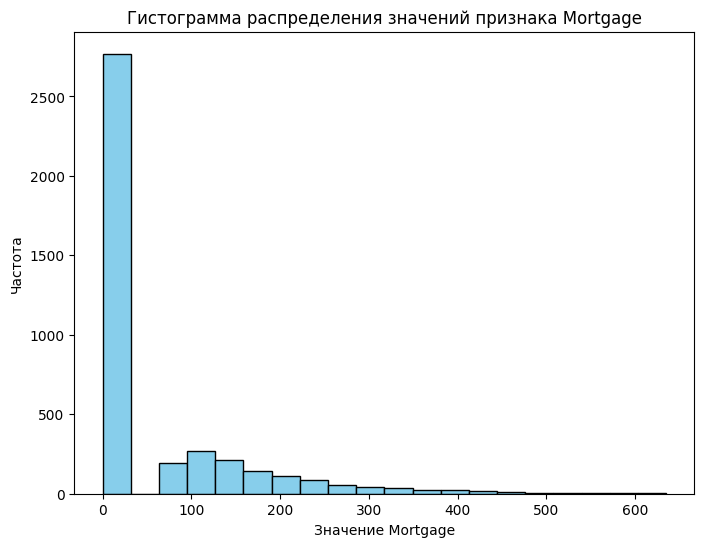

In [ ]:
plt.figure(figsize=(8, 6))  # Размер графика
df['Mortgage'].hist(bins=20, color='skyblue', edgecolor='black')  # Построение гистограммы
plt.xlabel('Значение Mortgage')  # Подпись оси x
plt.ylabel('Частота')  # Подпись оси y
plt.title('Гистограмма распределения значений признака Mortgage')  # Заголовок графика
plt.grid(False)  # Отключение сетки
plt.show()

Очевидно в рамках этого признака есть небольшое количество значений, которые лежат далеко. Можно использовать <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> функцию из библиотеки <code>scipy</code>.

Вспомнив курс теории вероятностей, становится понятно, что около $99.7\%$ нормального распределения сождержатся в отрезке $[-3\sigma, 3\sigma]$. Определите число элементов, модуль <code>z-score</code> которых больше, чем $3$.

In [ ]:
from scipy.stats import zscore

# Вычисление z-оценок для признака Mortgage
z_scores = zscore(df['Mortgage'])

# Подсчет числа элементов, модуль z-score которых больше 3
outliers_count = sum(abs(z_scores) > 3)

print(f"Число элементов, модуль z-score которых больше 3: {outliers_count}")

Число элементов, модуль z-score которых больше 3: 83


Итак, выбросов не очень множко, поэтому выбросите их из набора данных. Введите оставшееся в датасете число строк.

In [ ]:
z_scores = zscore(df['Mortgage'])

# Булева индексация для выбора строк с модулем z-score меньше или равным 3
filtered_df = df[abs(z_scores) <= 3]

# Выводим размер исходного и отфильтрованного DataFrame
print(f"Размер исходного DataFrame: {df.shape}")
print(f"Размер отфильтрованного DataFrame: {filtered_df.shape}")

# Заменяем исходный DataFrame отфильтрованным
df = filtered_df.copy()

Размер исходного DataFrame: (4000, 12)
Размер отфильтрованного DataFrame: (3917, 12)


# Построение моделей

# Базовый алгоритм

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

# Разделение данных на обучающую и тестовую выборки с стратификацией по колонке Personal Loan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=41)

Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Создание модели DecisionTreeClassifier с параметрами
model = DecisionTreeClassifier(random_state=41, criterion='gini')

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка модели на тестовых данных с помощью F1-score
f1 = f1_score(y_test, y_pred)

# Вывод результата
print(f"F1-score модели на тестовых данных: {f1:.3f}")

F1-score модели на тестовых данных: 0.870


In [ ]:
model = DecisionTreeClassifier(random_state=41, criterion='entropy')

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка модели на тестовых данных с помощью F1-score
f1 = f1_score(y_test, y_pred)

# Вывод результата
print(f"F1-score модели на тестовых данных: {f1:.3f}")

F1-score модели на тестовых данных: 0.887


## Учет дисбаланса соотношения классов

А теперь, если вспомнить, что выборка несбалансирована, то можно указать дополнительный параметр <code>class_weight</code>. Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [ ]:
model = DecisionTreeClassifier(random_state=41, criterion='gini', class_weight='balanced')

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка модели на тестовых данных с помощью F1-score
f1 = f1_score(y_test, y_pred)

# Вывод результата
print(f"F1-score модели на тестовых данных: {f1:.3f}")

F1-score модели на тестовых данных: 0.862


In [ ]:
model = DecisionTreeClassifier(random_state=41, criterion='entropy', class_weight='balanced')

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка модели на тестовых данных с помощью F1-score
f1 = f1_score(y_test, y_pred)

# Вывод результата
print(f"F1-score модели на тестовых данных: {f1:.3f}")

F1-score модели на тестовых данных: 0.840


## Upsampling обучающей выборки

Помимо очевидного присвоения весов несбалансированным классам, можно воспользоваться алгоритмом <code>SMOTE</code>. Ему на вход подаются экземпляры всех классов с их метками, а он в свою очередь пытается на их основе экстраполировать само распределение данных этого класса. После этого он сэмплирует новые объекты классов так, пока количество строк каждого класса не станет везде одинаковым.

Получается, что в таком случае будет получена сбалансированная выборка, и пропадет нужда как-то ухищряться с весами и прочим.

Определите долю элементов класса $0$ тренировочного набора данных.

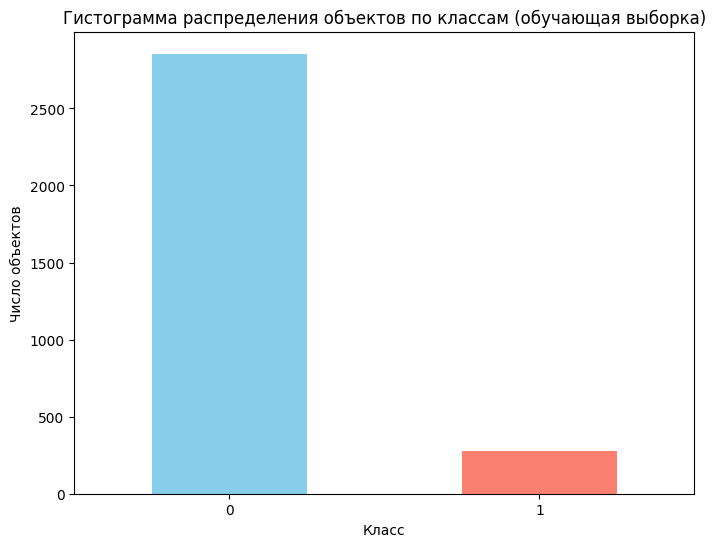

Доля элементов класса 0 в тренировочной выборке: 0.911


In [ ]:
plt.figure(figsize=(8, 6))
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Гистограмма распределения объектов по классам (обучающая выборка)')
plt.xlabel('Класс')
plt.ylabel('Число объектов')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.show()

# Определение доли элементов класса в тренировочном наборе данных
class_0_ratio = (y_train.value_counts()[0] / len(y_train)).round(3)
class_1_ratio = (y_train.value_counts()[1] / len(y_train)).round(3)

print(f"Доля элементов класса 0 в тренировочной выборке: {class_0_ratio}")

Используя класс <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> из модуля <code>imblearn.over_sampling</code> сбалансируйте обучающую выборку с параметрами, указанными в вашем варианте.

In [ ]:
from imblearn.over_sampling import SMOTE

# Создание экземпляра SMOTE с параметрами
smote = SMOTE(random_state=41)

# Применение SMOTE к обучающим данным
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Определение количества объектов класса в обучающей выборке после upsampling'а
class_0_count = sum(y_train_balanced == 0)
class_1_count = sum(y_train_balanced == 1)

print(f"Количество объектов класса 0 после upsampling'а: {class_0_count}")
print(f"Количество объектов класса 1 после upsampling'а: {class_1_count}")

Количество объектов класса 0 после upsampling'а: 2855
Количество объектов класса 1 после upsampling'а: 2855


Убедитесь, что теперь в выборке содержится одинаковое число представителей обоих классов. Введите количество объектов класса $1$.

In [ ]:
model_balanced = DecisionTreeClassifier(random_state=41, criterion='gini')

# Обучение модели на сбалансированных данных
model_balanced.fit(X_train_balanced, y_train_balanced)

# Предсказание на тестовом наборе данных
y_pred_balanced = model_balanced.predict(X_test)

# Оценка модели на тестовых данных с помощью F1-score
f1_balanced = f1_score(y_test, y_pred_balanced)

# Вывод результата
print(f"F1-score модели на тестовых данных после upsampling'а: {f1_balanced:.3f}")

F1-score модели на тестовых данных после upsampling'а: 0.859


Снова обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [ ]:
model_balanced = DecisionTreeClassifier(random_state=41, criterion='entropy')

# Обучение модели на сбалансированных данных
model_balanced.fit(X_train_balanced, y_train_balanced)

# Предсказание на тестовом наборе данных
y_pred_balanced = model_balanced.predict(X_test)

# Оценка модели на тестовых данных с помощью F1-score
f1_balanced = f1_score(y_test, y_pred_balanced)

# Вывод результата
print(f"F1-score модели на тестовых данных после upsampling'а: {f1_balanced:.3f}")

F1-score модели на тестовых данных после upsampling'а: 0.831


Задача 2

In [ ]:
df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')

z_scores = zscore(df['Mortgage'])

# Булева индексация для выбора строк с модулем z-score меньше или равным 3
filtered_df = df[abs(z_scores) <= 3.1]

# Выводим размер исходного и отфильтрованного DataFrame
print(f"Размер исходного DataFrame: {df.shape}")
print(f"Размер отфильтрованного DataFrame: {filtered_df.shape}")

# Заменяем исходный DataFrame отфильтрованным
df = filtered_df.copy()

Размер исходного DataFrame: (4000, 14)
Размер отфильтрованного DataFrame: (3923, 14)


In [ ]:
X_train = df.drop('Personal Loan', axis=1)
y_train = df['Personal Loan']

In [ ]:
X_test = pd.read_csv('Bank_Personal_Loan_Modelling_reserved.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание модели GradientBoostingClassifier с параметрами
model_boosted = GradientBoostingClassifier(random_state=41)

# Обучение модели на обучающем наборе данных
model_boosted.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred_boosted = model_boosted.predict(X_test)

# Вывод результата
print(y_pred_boosted.tolist())

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# Создание модели CatBoostClassifier с параметрами
model_catboost = CatBoostClassifier(random_state=41)

# Обучение модели на обучающем наборе данных
model_catboost.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred_catboost = model_catboost.predict(X_test)

# Вывод результата
print(y_pred_catboost.tolist())

Learning rate set to 0.018468
0:	learn: 0.6569428	total: 50.3ms	remaining: 50.2s
1:	learn: 0.6234269	total: 53.3ms	remaining: 26.6s
2:	learn: 0.5900199	total: 56.1ms	remaining: 18.6s
3:	learn: 0.5515717	total: 58.9ms	remaining: 14.7s
4:	learn: 0.5225853	total: 61.6ms	remaining: 12.3s
5:	learn: 0.4972635	total: 64.5ms	remaining: 10.7s
6:	learn: 0.4657839	total: 67.5ms	remaining: 9.57s
7:	learn: 0.4382647	total: 71.5ms	remaining: 8.87s
8:	learn: 0.4048231	total: 75.7ms	remaining: 8.34s
9:	learn: 0.3843170	total: 78.7ms	remaining: 7.8s
10:	learn: 0.3588855	total: 81.3ms	remaining: 7.31s
11:	learn: 0.3345294	total: 84.3ms	remaining: 6.94s
12:	learn: 0.3159358	total: 87.2ms	remaining: 6.62s
13:	learn: 0.3031027	total: 90.1ms	remaining: 6.35s
14:	learn: 0.2902166	total: 93ms	remaining: 6.11s
15:	learn: 0.2784578	total: 95.9ms	remaining: 5.9s
16:	learn: 0.2679745	total: 98.6ms	remaining: 5.7s
17:	learn: 0.2540382	total: 101ms	remaining: 5.53s
18:	learn: 0.2384186	total: 104ms	remaining: 5.38s